<a href="https://colab.research.google.com/github/sivask01/CMPE-255-01/blob/main/HealthyLife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
import pandas as pd
# Assuming your file is in the "My Drive" folder
file_path = '/content/drive/My Drive/Colab Notebooks/insurance-task/insurance.csv'
insurance_data = pd.read_csv(file_path)

In [17]:
insurance_data

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


No Empty values are there, so I dont have to handle missing values

## Data preprocessing

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [20]:
# Drop the 'index' column as it's not useful for analysis
insurance_data.drop('index', axis=1, inplace=True)

In [21]:
insurance_data['region'].value_counts().sort_values()

,count
region,
northeast,324
southwest,325
northwest,325
southeast,364


In [22]:
insurance_data['children'].value_counts().sort_values()

,count
children,
5,18
4,25
3,157
2,240
1,324
0,574


### Data Mapping

In [24]:
# Define the mapping for categorical variables
insurance_data_mapping = {
    'sex': {'male': 0, 'female': 1},
    'smoker': {'no': 0, 'yes': 1},
    'region': {'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3}
}

# Replace categorical values with numerical values
insurance_data.replace(insurance_data_mapping, inplace=True)

In [57]:
cleaned_data = insurance_data.copy()

In [58]:
cleaned_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


##EDA

In [29]:
cleaned_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


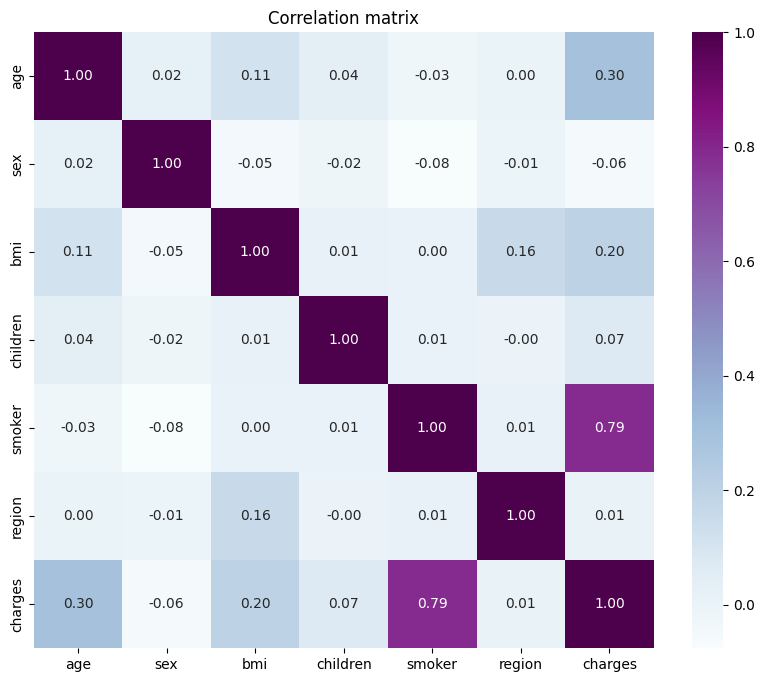

In [32]:
corr = cleaned_data.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Correlation matrix")
plt.show()

From this plot, I can say, Charges mostly depend on Smoking, Age and BMI.
remaining features has less impact on insurance charges

<ipython-input-33-5e9a7e543274>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age',y='charges',data=cleaned_data,palette='husl')


<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

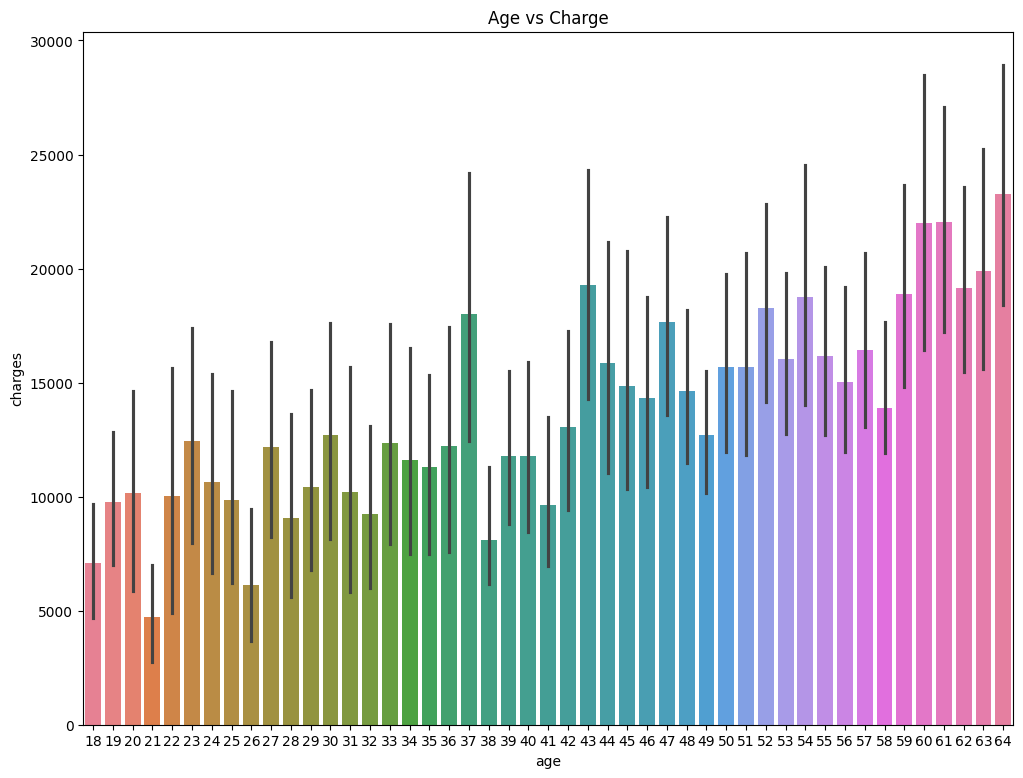

In [33]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=cleaned_data,palette='husl')

This plot clearly states that, age alone is not enought to predict charges as it has good amount of range in predcition for each age.

Also, I understand increasing age likely charge more insurance.

<ipython-input-34-11232f7ea825>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges',data=cleaned_data,palette='husl')


<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

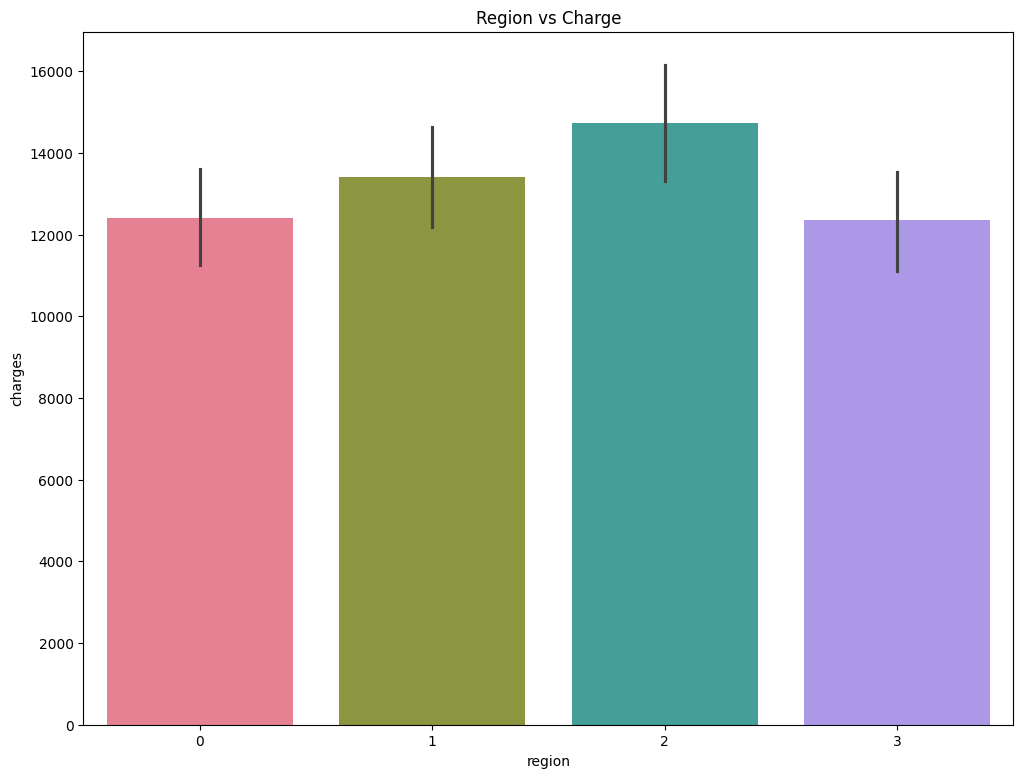

In [34]:
plt.figure(figsize=(12,9))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=cleaned_data,palette='husl')

region not effecting charges much

<ipython-input-35-43319a23a2f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='smoker',y='charges',data=cleaned_data,palette='husl')


<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

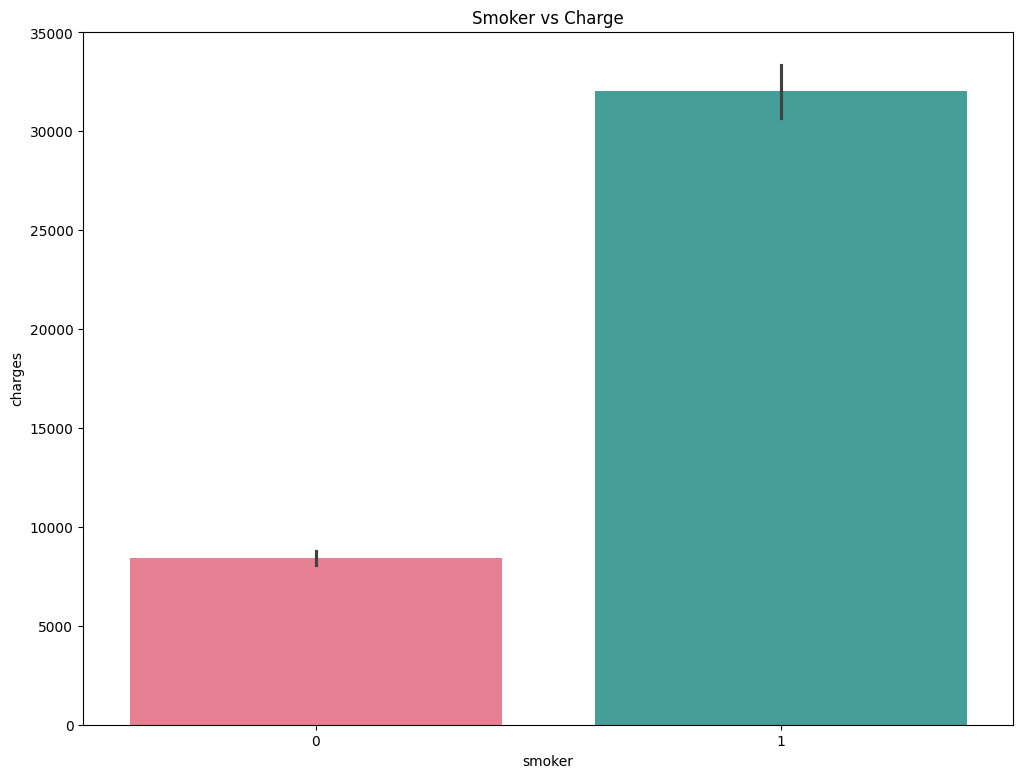

In [35]:
plt.figure(figsize=(12,9))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=cleaned_data,palette='husl')

Smoking "yes" affecting charges a lot

<ipython-input-38-f68a682e0998>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='bmi',y='charges',data=cleaned_data,palette='husl')


<Axes: title={'center': 'BMI vs Charge'}, xlabel='bmi', ylabel='charges'>

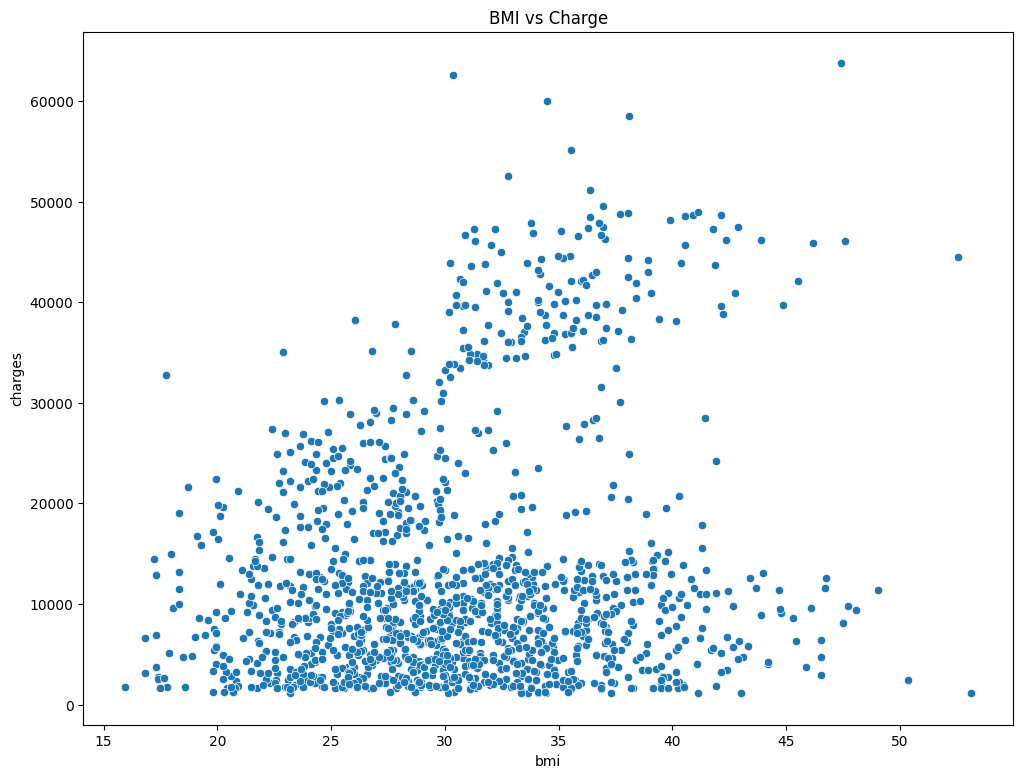

In [38]:
plt.figure(figsize=(12,9))
plt.title('BMI vs Charge')
sns.scatterplot(x='bmi',y='charges',data=cleaned_data,palette='husl')

BMI also has more impact on charges. Mostly, Charges over 30k are people who has BMI > 30

<ipython-input-41-dc6834e2e66d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['age'])
<ipython-input-41-dc6834e2e66d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['smoker'])
<ipython-input-41-dc6834e2e66d>:14: UserWarning: 

`distplot` is a deprecated function an

Text(0, 0.5, 'Count')

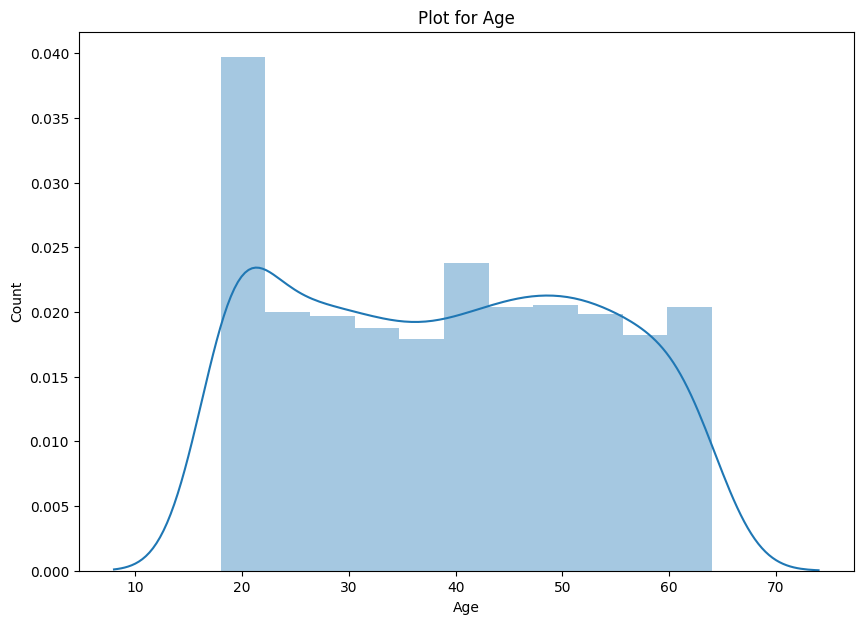

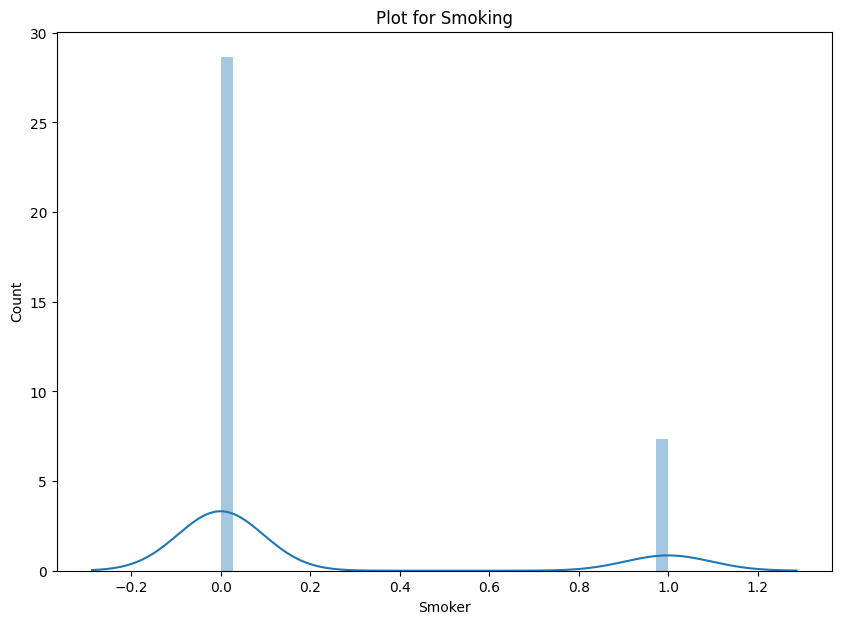

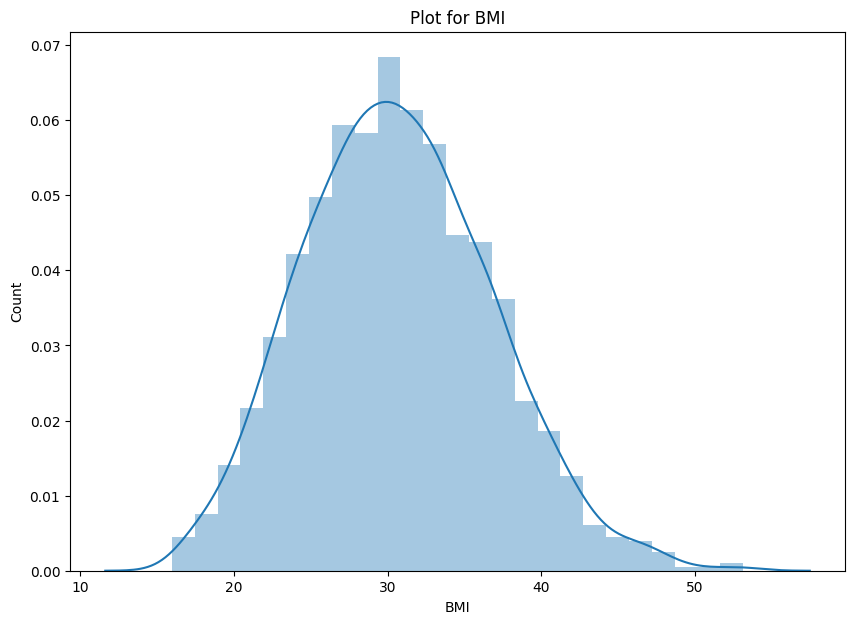

In [41]:
plt.figure(figsize=(10,7))
sns.distplot(cleaned_data['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.figure(figsize=(10,7))
sns.distplot(cleaned_data['smoker'])
plt.title('Plot for Smoking')
plt.xlabel('Smoker')
plt.ylabel('Count')

plt.figure(figsize=(10,7))
sns.distplot(cleaned_data['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

<ipython-input-42-fea3337ef5e6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['sex'])
<ipython-input-42-fea3337ef5e6>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['region'])
<ipython-input-42-fea3337ef5e6>:15: UserWarning: 

`distplot` is a deprecated function an

Text(0, 0.5, 'Count')

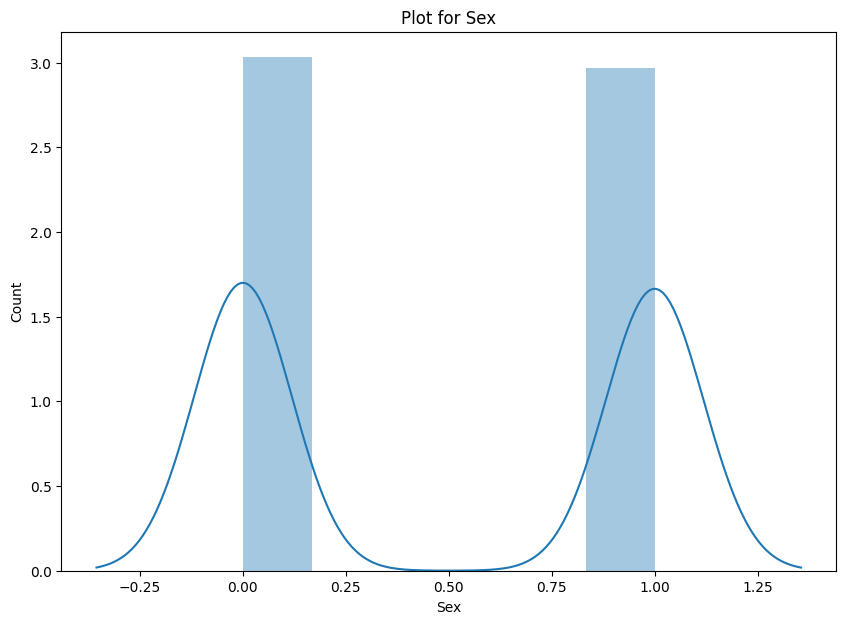

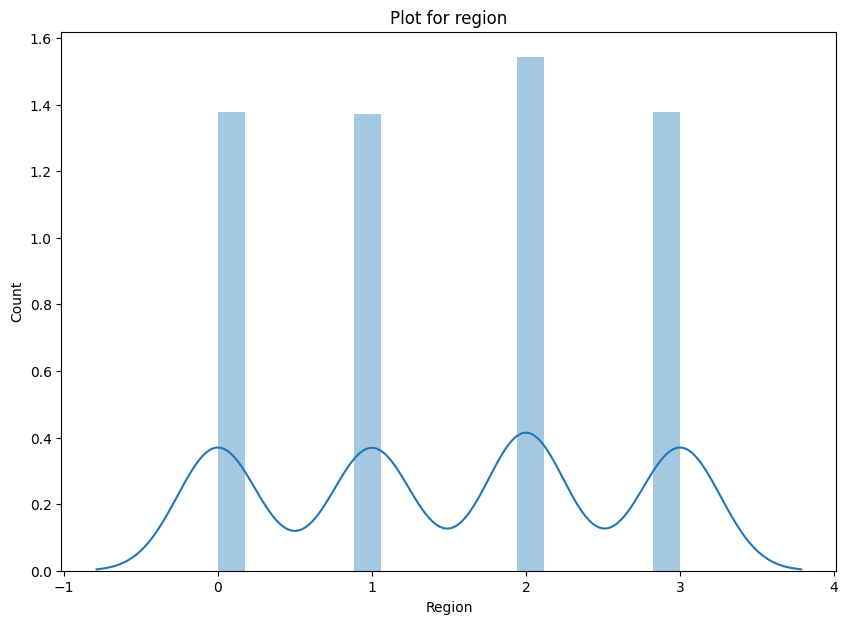

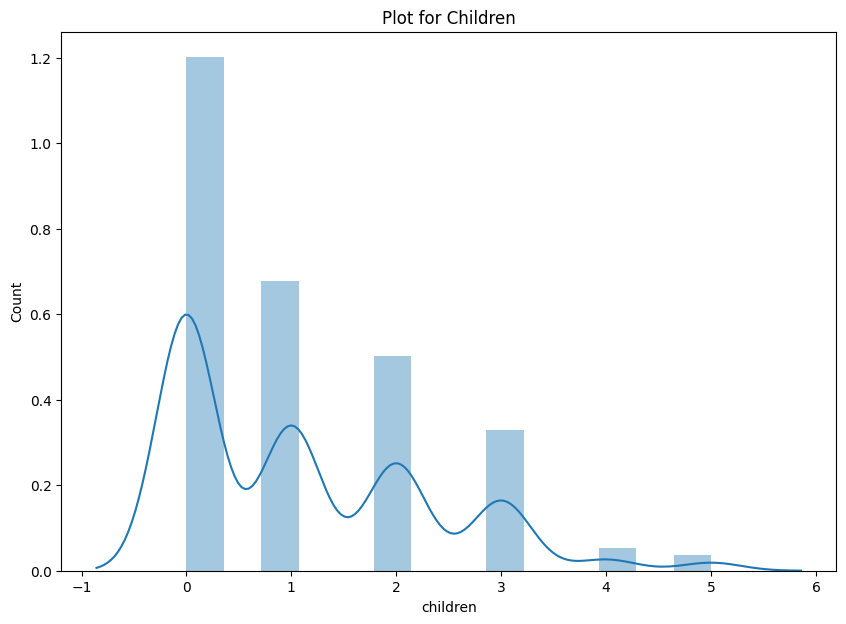

In [42]:
plt.figure(figsize=(10,7))
sns.distplot(cleaned_data['sex'])
plt.title('Plot for Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.figure(figsize=(10,7))
sns.distplot(cleaned_data['region'])
plt.title('Plot for region')
plt.xlabel('Region')
plt.ylabel('Count')
+

plt.figure(figsize=(10,7))
sns.distplot(cleaned_data['children'])
plt.title('Plot for Children')
plt.xlabel('children')
plt.ylabel('Count')

<ipython-input-43-58575886b4e8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['charges'])


Text(0, 0.5, 'Count')

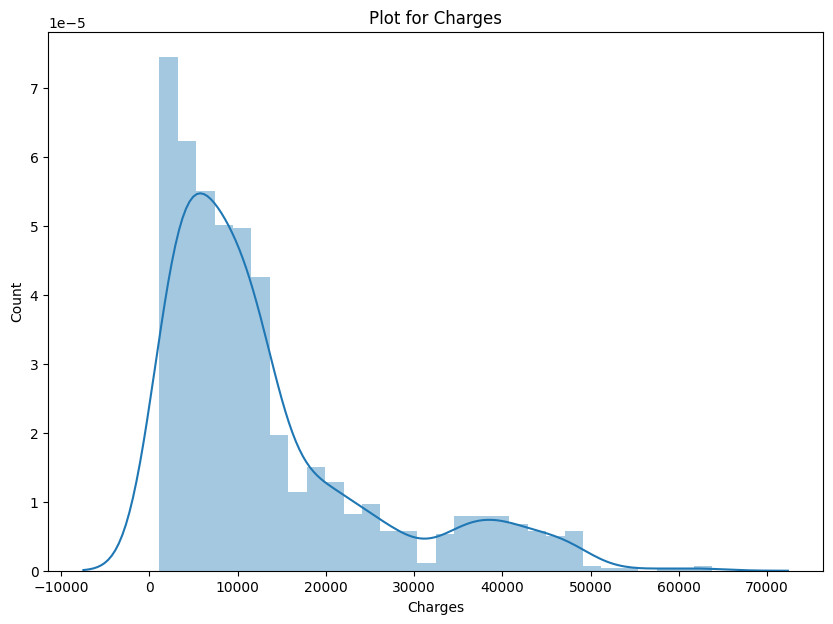

In [43]:
plt.figure(figsize=(10,7))
sns.distplot(cleaned_data['charges'])
plt.title('Plot for Charges')
plt.xlabel('Charges')
plt.ylabel('Count')

***Key Takeaways***


*   Age, sex, and region are fairly symmetrical and have relatively normal distributions.
*  BMI and children show slight right skewness, with children having more pronounced skewness due to the nature of count data.
*Smoker and charges show significant right skewness, meaning most people are non-smokers and have lower insurance charges, but there are outliers (smokers and high-risk individuals) pulling the distribution to the right.
*Charges also have heavier tails, which means we have some extreme values/outliers that need to be considered.

```
# This is formatted as code
```



## Feature Engineering

### Scale BMI and Charges

In [59]:
scale_data = cleaned_data.copy()
tempBmi = scale_data.bmi
tempBmi = tempBmi.values.reshape(-1,1)
scale_data['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge =scale_data.age
tempAge = tempAge.values.reshape(-1,1)
scale_data['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = scale_data.charges
tempCharges = tempCharges.values.reshape(-1,1)
scale_data['charges'] = StandardScaler().fit_transform(tempCharges)

scale_data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


### Remove least important features

In [60]:
data_processed = scale_data[['age', 'bmi', 'smoker', 'charges']]

In [61]:
data_processed.head()

,age,bmi,smoker,charges
0,-1.438764,-0.453320,1,0.298584
1,-1.509965,0.509621,0,-0.953689
2,-0.797954,0.383307,0,-0.728675
3,-0.441948,-1.305531,0,0.719843
4,-0.513149,-0.292556,0,-0.776802


## Linear Regression

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
def train_linear_regression(df):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score

    # Define the features (X) and target variable (y)
    X = df.iloc[:, :-1] # Features
    y = df.iloc[:,-1]  # Target variable

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2


## Linear Regresion after removing least important features

In [64]:
mse, r2 = train_linear_regression(data_processed)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.2355138005515096
R² Score: 0.7776932310583375


## Linear Regresion after with all features since we have only less number of dependencies

In [65]:

mse, r2 = train_linear_regression(scale_data)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.23021607463025992
R² Score: 0.7826938736089379


## RandomForest

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def train_random_forest(df):
    # Define the features (X) and target variable (y)
    X = df.iloc[:, :-1]  # Features
    y = df.iloc[:, -1]   # Target variable

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest Regressor model
    model = RandomForestRegressor(random_state=42, n_estimators=100)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training set (for training accuracy)
    y_train_pred = model.predict(X_train)

    # Predict on the test set (for testing accuracy)
    y_test_pred = model.predict(X_test)



    # Evaluate the model on the training set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Evaluate the model on the test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Plotting the actual vs predicted charges for the test set
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title('Actual Charges vs Predicted Charges')
    plt.legend()
    plt.show()

    return train_mse, train_r2, test_mse, test_r2

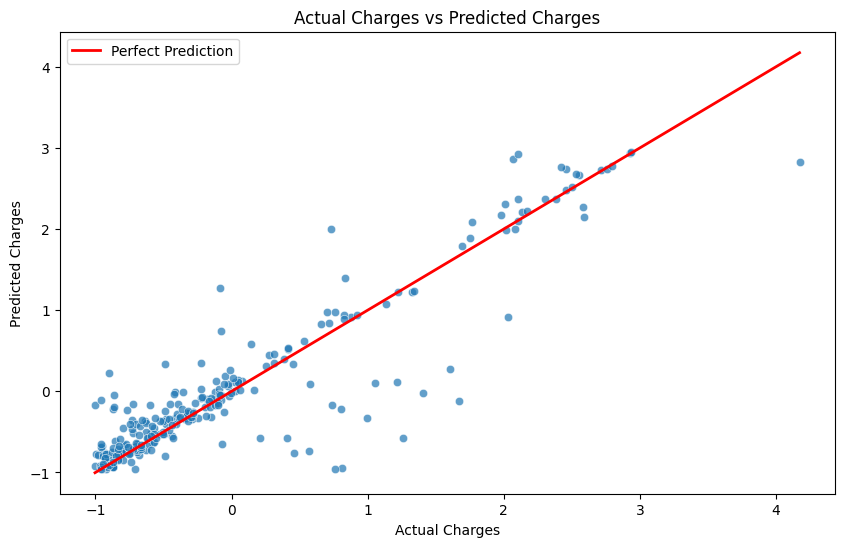

After removing least important features
Training MSE: 0.03138908904236125
Training R²: 0.9681304751840117
Testing MSE: 0.17592265607655166
Testing R²: 0.833942651494599


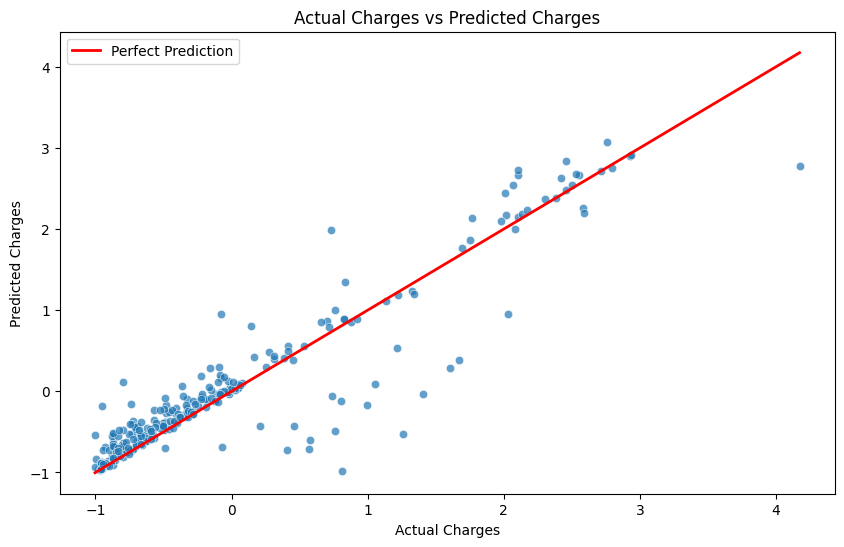

--------------------------
Without removing least important features
Training MSE: 0.025416059684788977
Training R²: 0.9741949266588817
Testing MSE: 0.14498562221457928
Testing R²: 0.8631448129916689


In [74]:
# Example usage with removing least important features
train_mse, train_r2, test_mse, test_r2 = train_random_forest(data_processed)
print("After removing least important features")
print(f"Training MSE: {train_mse}")
print(f"Training R²: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing R²: {test_r2}")

# Example usage without removing least important features
train_mse, train_r2, test_mse, test_r2 = train_random_forest(scale_data)
print("--------------------------")
print("Without removing least important features")
print(f"Training MSE: {train_mse}")
print(f"Training R²: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing R²: {test_r2}")

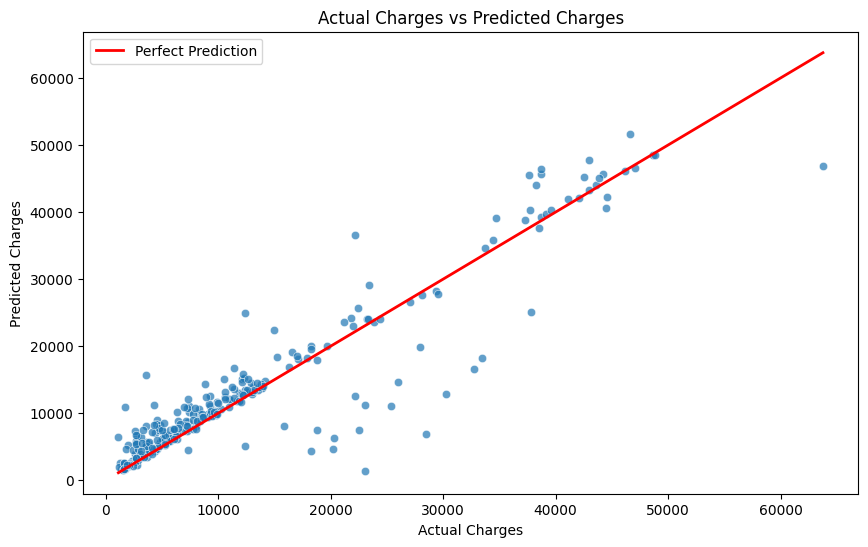

Training MSE: 3731096.5306111476
Training R²: 0.9741494983591605
Testing MSE: 21289638.49945772
Testing R²: 0.8628675526370672


In [76]:
# Example usage without Scaling
train_mse, train_r2, test_mse, test_r2 = train_random_forest(cleaned_data)
print(f"Training MSE: {train_mse}")
print(f"Training R²: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing R²: {test_r2}")

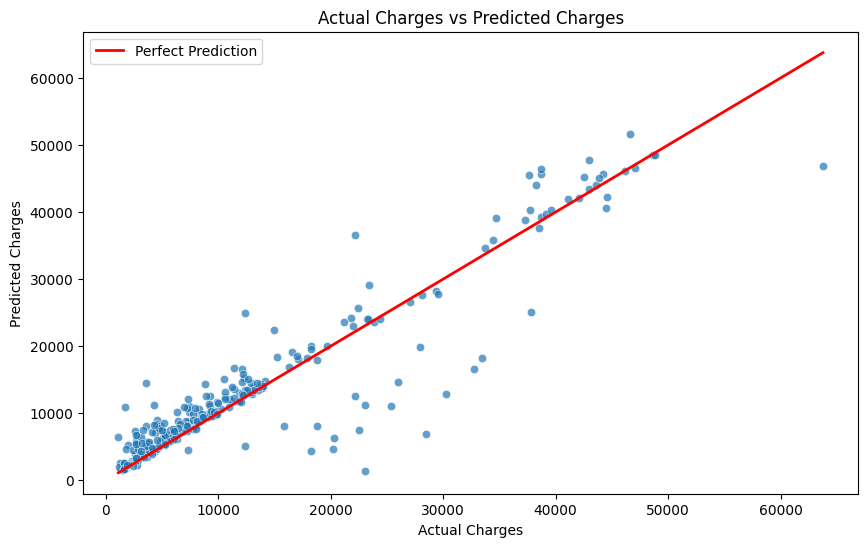

Training MSE: 3726557.4506823127
Training R²: 0.974180946887009
Testing MSE: 21196478.672119483
Testing R²: 0.8634676208401569


In [78]:
temp_data = cleaned_data.copy()
tempBmi = temp_data.bmi
tempBmi = tempBmi.values.reshape(-1,1)
temp_data['bmi'] = StandardScaler().fit_transform(tempBmi)

# tempAge =temp_data.age
# tempAge = tempAge.values.reshape(-1,1)
# temp_data['age'] = StandardScaler().fit_transform(tempAge)

# tempCharges = scale_data.charges
# tempCharges = tempCharges.values.reshape(-1,1)
# scale_data['charges'] = StandardScaler().fit_transform(tempCharges)


# Example usage without Scaling
train_mse, train_r2, test_mse, test_r2 = train_random_forest(temp_data)
print(f"Training MSE: {train_mse}")
print(f"Training R²: {train_r2}")
print(f"Testing MSE: {test_mse}")
print(f"Testing R²: {test_r2}")

In this temp data, I am not scling charges and it is slightly higher than other accuracies.

Still Accuracy can be improved using models like gradient boosting and by hyperparameter tuning but I dont think these can impact more.
So, I would like to try out new models like neural networks here.

I can prepare data for LLMs but I dont think LLM can cross 90% accuracy in calculations.

## Neural Networks

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Preprocess the data: scaling the features
def preprocess_data(df):
    X = df.iloc[:, :-1]  # Features
    y = df.iloc[:, -1]   # Target variable

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # # Scale the features using StandardScaler
    # scaler = StandardScaler()
    # X_train_scaled = scaler.fit_transform(X_train)
    # X_test_scaled = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [84]:
# Define and train the neural network model
def train_neural_network(X_train, y_train, X_test, y_test):
    # Define the neural network architecture
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer and first hidden layer
    model.add(Dense(64, activation='relu'))  # Second hidden layer
    model.add(Dense(1))  # Output layer for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate the model
    test_loss = model.evaluate(X_test, y_test)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Calculate MSE and R² score
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    return model, mse, r2, y_test, y_test_pred


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Actual vs Predicted values
def plot_actual_vs_predicted(y_test, y_test_pred):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_test_pred.flatten(), alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title('Actual Charges vs Predicted Charges (Neural Network)')
    plt.legend()
    plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 354696800.0000 - val_loss: 309637728.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 319242080.0000 - val_loss: 308412736.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 329969312.0000 - val_loss: 306069792.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 325661056.0000 - val_loss: 301904576.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 286238688.0000 - val_loss: 295015584.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 299254560.0000 - val_loss: 284757984.0000
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 298013856.0000 - val_loss: 270930368.0000
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 270151776.0000 - val_loss: 253205088.0000
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 265149024.0000 - val_loss: 232796000.0000
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 210402880.0000 - val_loss: 210452288.0000

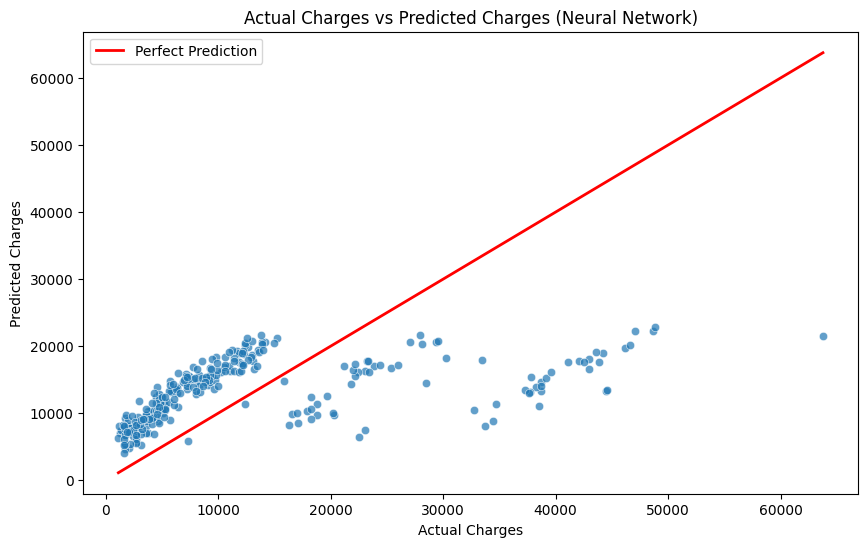

In [88]:
# For processed_data (unscaled)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = preprocess_data(temp_data)
model_scaled, mse_scaled, r2_scaled, y_test_scaled, y_test_pred_scaled = train_neural_network(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

print("Results for processed (unscaled) data:")
print(f"Mean Squared Error: {mse_scaled}")
print(f"R² Score: {r2_scaled}")
plot_actual_vs_predicted(y_test_scaled, y_test_pred_scaled)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 310698528.0000 - val_loss: 309455936.0000
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 347294848.0000 - val_loss: 307909568.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 332232160.0000 - val_loss: 304557184.0000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 329047520.0000 - val_loss: 298014432.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 313880896.0000 - val_loss: 287072608.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 281582048.0000 - val_loss: 270717856.0000
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 281627456.0000 - val_loss: 249043120.0000
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 242568800.0000 - val_loss: 223365152.0000
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 203483152.0000 - val_loss: 196159104.0000
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 173848000.0000 - val_loss: 170918576.0000


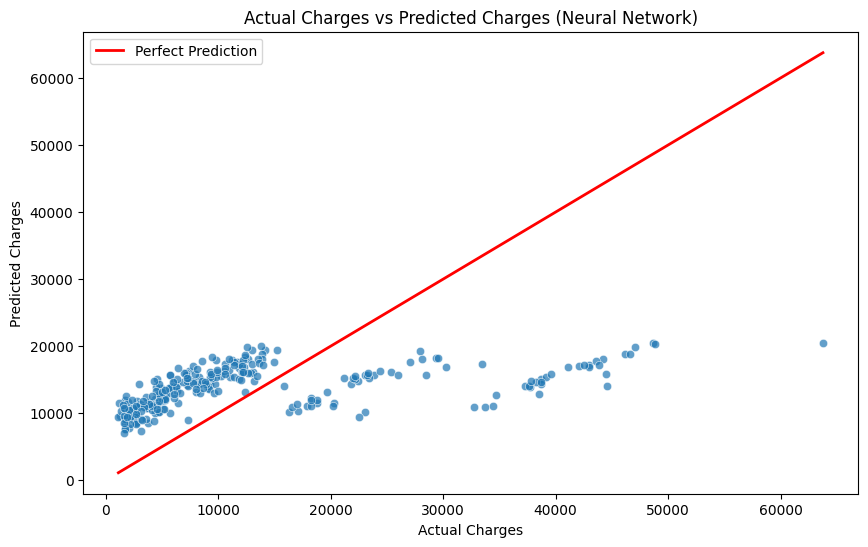

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.9466 - val_loss: 0.7339
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6680 - val_loss: 0.3860
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2930 - val_loss: 0.1744
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1711 - val_loss: 0.1433
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1505 - val_loss: 0.1417
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1490 - val_loss: 0.1398
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1556 - val_loss: 0.1449
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1765 - val_loss: 0.1397
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1612 - val_loss: 0.1377
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1497 - val_loss: 0.1392
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1609 - val_loss: 0.1392
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1445 - val_l

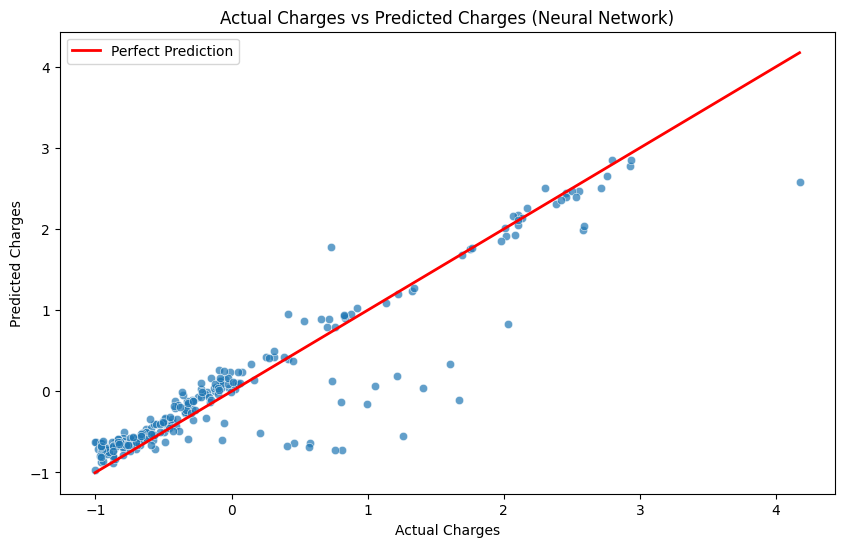

In [87]:
# For cleaned_data (with all features)
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = preprocess_data(cleaned_data)
model_cleaned, mse_cleaned, r2_cleaned, y_test_cleaned, y_test_pred_cleaned = train_neural_network(X_train_cleaned, y_train_cleaned, X_test_cleaned, y_test_cleaned)

print("Results for cleaned (scaled) data:")
print(f"Mean Squared Error: {mse_cleaned}")
print(f"R² Score: {r2_cleaned}")
plot_actual_vs_predicted(y_test_cleaned, y_test_pred_cleaned)

# For processed_data (removed least important features)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = preprocess_data(data_processed)
model_scaled, mse_scaled, r2_scaled, y_test_scaled, y_test_pred_scaled = train_neural_network(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

print("Results for processed (scaled) data:")
print(f"Mean Squared Error: {mse_scaled}")
print(f"R² Score: {r2_scaled}")
plot_actual_vs_predicted(y_test_scaled, y_test_pred_scaled)


So, neural networks performed better with less features but still not varied much in accuracy compared to RFRegressor and RF is computationally better

Looking at the plot, theere are few outliers and few are not predicting properly though they are not outliers, So I can try using polynomial Features

## Experimenting NN with parameters

In [91]:
# Define and train the neural network model with targeted adjustments
def train_neural_network_fast(X_train, y_train, X_test, y_test, layers=2, neurons=64, activation='relu', optimizer='adam', learning_rate=0.001, dropout_rate=None, epochs=50, batch_size=64, regularization=None):

    # Create the model
    model = Sequential()

    # Input layer and first hidden layer
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation, kernel_regularizer=regularization))

    # Add more hidden layers based on 'layers' parameter
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation, kernel_regularizer=regularization))
        if dropout_rate:  # Add dropout if specified
            model.add(Dropout(dropout_rate))

    # Output layer for regression
    model.add(Dense(1))

    # Choose optimizer based on input
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=opt, loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

    # Evaluate the model
    test_loss = model.evaluate(X_test, y_test)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Calculate MSE and R² score
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    return model, mse, r2, y_test, y_test_pred


In [101]:
# Experiment with a faster configuration
model, mse, r2, y_test, y_test_pred = train_neural_network_fast(
    X_train_scaled,
    y_train,
    X_test_scaled,
    y_test,
    layers=2,
    neurons=128,
    activation='relu',
    optimizer='adam',  # Adam optimizer
    learning_rate=0.001,
    dropout_rate=0.1,  # Small dropout to prevent overfitting
    epochs=120,
    batch_size=32,
    regularization=l2(0.0001)  # Small regularization to avoid overfitting
)

Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 34.0371 - val_loss: 3.0303
Epoch 2/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8047 - val_loss: 1.0663
Epoch 3/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5542 - val_loss: 0.8879
Epoch 4/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4684 - val_loss: 0.7979
Epoch 5/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1510 - val_loss: 0.7325
Epoch 6/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1054 - val_loss: 0.6724
Epoch 7/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1468 - val_loss: 0.5946
Epoch 8/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.8125 - val_loss: 0.5261
Epoch 9/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7192 - val_loss: 0.4583
Epoch 10/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6019 - val_loss: 0.4127
Epoch 11/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4876 - val_loss: 0.3592
Epoch 12/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4364 -

In [102]:
print("NN results")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

NN results
Mean Squared Error: 0.10983281088262276
R² Score: 0.8980086674048318


here neural networks performed better than RF but RF is computationally better. Also, we cant say much with the amount of data we have.

I have tried these models using different feature extractions.
We see model drifting between multiple scenarios but actual model drifting can be idenfied using tools like Alibhi detect or EvidentAI when we have the new data especially if we use this in production environment.

If we see any drift, then I can retrain the model with updated data